#### Creating Startup Database

In [1]:
pwd

'C:\\Users\\asus\\pythonfiles'

In [2]:
import sqlite3
conn=sqlite3.connect('StartUp_Primary.db')
cursor=conn.cursor()
sql='''
CREATE TABLE STARTUP_P(
    S_NO INTEGER,
    YEAR INTEGER,
    STATE varchar(40),
    INDUSTRY varchar(40),
    COUNT INTEGER,
    PRIMARY KEY(YEAR,STATE,INDUSTRY)
    );
'''


In [3]:
#cursor.execute(sql)
conn.commit()
conn.close()

#### Reading & Filtering Primary Data

In [4]:
import pandas as pd
import tabulate as tb

df=pd.read_csv('gov-data-final.csv')
print(tb.tabulate(df.head(), headers = 'keys', tablefmt = 'psql'))

#The Last Updated Column is of no use to the currrent project, hence dropping the column values

df=df.drop(['Last Update'], axis=1)
print(tb.tabulate(df.head(), headers = 'keys', tablefmt = 'psql'))


df.to_csv('filterd_gov_data.csv', index=False)



+----+---------+--------+-----------------------------+-------------------------------------+---------+----------------+
|    |   S No. |   Year | State                       | Industry                            |   Count | Last Update    |
|----+---------+--------+-----------------------------+-------------------------------------+---------+----------------|
|  0 |       1 |   2022 | Andaman and Nicobar Islands | Agriculture                         |       1 | 2/10/2022 4:00 |
|  1 |       2 |   2022 | Andaman and Nicobar Islands | AR VR (Augmented + Virtual Reality) |       1 | 2/10/2022 4:00 |
|  2 |       3 |   2022 | Andaman and Nicobar Islands | Construction                        |       1 | 2/10/2022 4:00 |
|  3 |       4 |   2022 | Andaman and Nicobar Islands | Internet of Things                  |       1 | 2/10/2022 4:00 |
|  4 |       5 |   2022 | Andaman and Nicobar Islands | Marketing                           |       1 | 2/10/2022 4:00 |
+----+---------+--------+-------

#### Sending Primary Data to SQLite

In [ ]:
conn=sqlite3.connect('StartUp_Primary.db')
cursor=conn.cursor()
with open('filterd_gov_data.csv','r') as file:
    records=0
    for row in file:
        cursor.execute('INSERT INTO STARTUP_P VALUES(?,?,?,?,?)',row.split(','))
        conn.commit()
        records+=1
conn.close()
print('\n{} Records transfer Completed'.format(records))

#### Displaying the Database can be Queried

In [6]:
conn=sqlite3.connect('StartUp_Primary.db')
cursor=conn.cursor()
cursor.execute("SELECT * FROM STARTUP_P WHERE S_No=1;")
result=cursor.fetchall()
print(result)
conn.commit()

[(1, 2022, 'Andaman and Nicobar Islands', 'Agriculture', 1)]


#### Data Visualization and Processing

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9

primary_df=pd.read_csv('filterd_gov_data.csv')

#For Scope of this Project Not Specified Values cannot Conclude Anything thus Dropping Those Values.
primary_df.drop(primary_df[primary_df['Industry']=='NOT SPECIFIED'].index,inplace=True)

In [8]:
primary_df

S No.  Year                        State  \
0         1  2022  Andaman and Nicobar Islands   
1         2  2022  Andaman and Nicobar Islands   
2         3  2022  Andaman and Nicobar Islands   
3         4  2022  Andaman and Nicobar Islands   
4         5  2022  Andaman and Nicobar Islands   
...     ...   ...                          ...   
5855   5856  2017                  West Bengal   
5856   5857  2017                  West Bengal   
5857   5858  2017                  West Bengal   
5858   5859  2017                  West Bengal   
5859   5860  2017                  West Bengal   

                                 Industry  Count  
0                             Agriculture      1  
1     AR VR (Augmented + Virtual Reality)      1  
2                            Construction      1  
3                      Internet of Things      1  
4                               Marketing      1  
...                                   ...    ...  
5855                  Technology Hardware      5  
5856       Telecommunication & Networking      2  
5857                   Textiles & Apparel      1  
5858             Transportation & Storage      4  
5859                     Travel & Tourism      3  

[5827 rows x 5 columns]

pip install plotnine

#### Number of startups in different sectors

In [9]:
no_of_startup_by_industry_df=primary_df.groupby('Industry').sum()['Count'].reset_index()
print(tb.tabulate(no_of_startup_by_industry_df, headers = 'keys', tablefmt = 'psql'))


+----+-------------------------------------+---------+
|    | Industry                            |   Count |
|----+-------------------------------------+---------|
|  0 | AI                                  |    1473 |
|  1 | AR VR (Augmented + Virtual Reality) |     420 |
|  2 | Advertising                         |     594 |
|  3 | Aeronautics Aerospace & Defence     |     763 |
|  4 | Agriculture                         |    3848 |
|  5 | Airport Operations                  |      10 |
|  6 | Analytics                           |     600 |
|  7 | Animation                           |      81 |
|  8 | Architecture Interior Design        |     454 |
|  9 | Art & Photography                   |     262 |
| 10 | Automotive                          |    1622 |
| 11 | Biotechnology                       |     197 |
| 12 | Chemicals                           |     672 |
| 13 | Computer Vision                     |     212 |
| 14 | Construction                        |    3095 |
| 15 | Dat

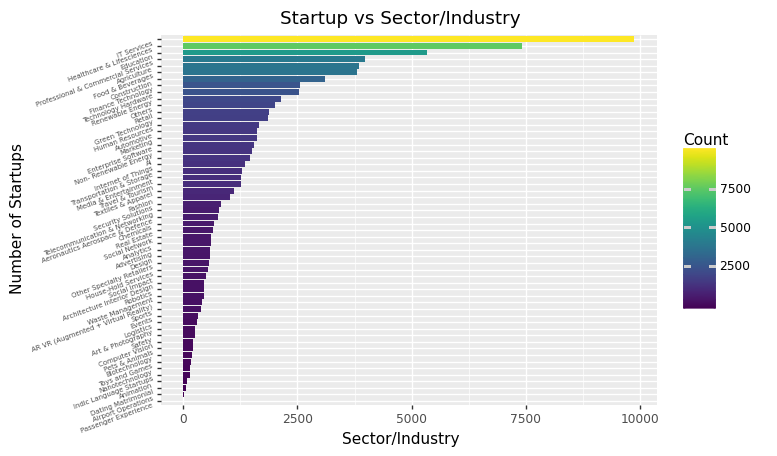

In [10]:
plot=p9.ggplot(no_of_startup_by_industry_df,p9.aes(x='reorder(Industry,Count)',y='Count',fill='Count'))+p9.geom_bar(stat='identity')+\
p9.coord_flip()+\
p9.theme(axis_text_y =p9.element_text(angle=20,vjust = 1,size=5))+\
p9.labs(x='Number of Startups',y='Sector/Industry')+\
p9.ggtitle('Startup vs Sector/Industry')
print(plot)

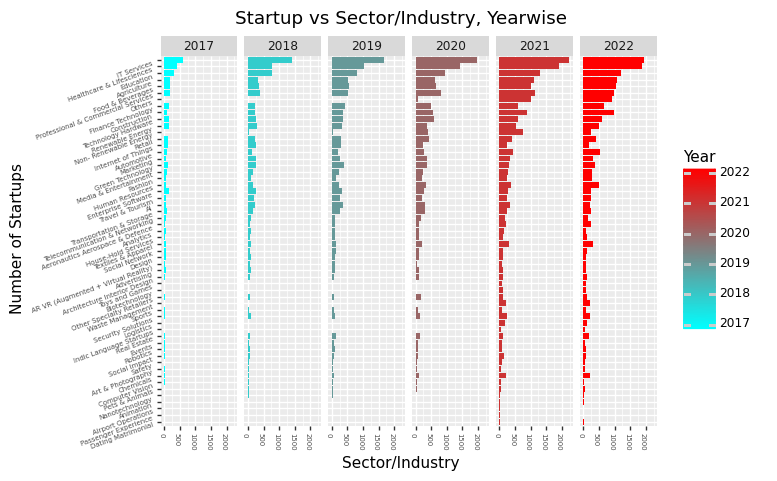

In [11]:

plot=p9.ggplot(primary_df,p9.aes(x='reorder(Industry,Count)',y='Count',fill='Year'))+p9.geom_bar(stat='identity')+\
p9.coord_flip()+\
p9.theme(axis_text_y =p9.element_text(angle=20,vjust = 1,size=5),axis_text_x =p9.element_text(angle=-90,hjust = 1,size=5))+\
p9.facet_grid('~Year')+\
p9.labs(x='Number of Startups',y='Sector/Industry')+\
p9.scale_fill_gradient(low="cyan",high="red")+\
p9.ggtitle('Startup vs Sector/Industry, Yearwise')
print(plot)

#### Filtering DataFrame

In [12]:
#Group By State for Visualization
no_of_startup_by_state_df=primary_df.groupby('State').sum()['Count'].reset_index().sort_values(by='Count',ascending=False)
no_of_startup_by_state_df=no_of_startup_by_state_df.reset_index(drop=True)

print(tb.tabulate(no_of_startup_by_state_df.head(13), headers = 'keys', tablefmt = 'psql'))

no_of_startup_by_state_df['Percentage']=round((no_of_startup_by_state_df['Count']/(no_of_startup_by_state_df['Count'].sum()))*100,2)
print(tb.tabulate(no_of_startup_by_state_df.head(13), headers = 'keys', tablefmt = 'psql'))

no_of_startup_by_state_df1=no_of_startup_by_state_df[no_of_startup_by_state_df['Percentage']>2.0]
no_of_startup_by_state_df2=no_of_startup_by_state_df[no_of_startup_by_state_df['Percentage']<2.0]
y=no_of_startup_by_state_df2.sum(numeric_only=True)
update_row={'State':['Other States'],'Count':[y[0]],'Percentage':[y[1]]}
update_df=pd.DataFrame(update_row)
no_of_startup_by_state_df1=pd.concat([no_of_startup_by_state_df1,update_df],join='outer').reset_index(drop=True)

print(tb.tabulate(no_of_startup_by_state_df1.head(13), headers = 'keys', tablefmt = 'psql'))

+----+----------------+---------+
|    | State          |   Count |
|----+----------------+---------|
|  0 | Maharashtra    |   14667 |
|  1 | Karnataka      |    9415 |
|  2 | Delhi          |    9158 |
|  3 | Uttar Pradesh  |    7320 |
|  4 | Gujarat        |    5516 |
|  5 | Tamil Nadu     |    4357 |
|  6 | Haryana        |    4287 |
|  7 | Telangana      |    4193 |
|  8 | Kerala         |    3544 |
|  9 | West Bengal    |    2581 |
| 10 | Rajasthan      |    2566 |
| 11 | Madhya Pradesh |    2354 |
| 12 | Odisha         |    1444 |
+----+----------------+---------+
+----+----------------+---------+--------------+
|    | State          |   Count |   Percentage |
|----+----------------+---------+--------------|
|  0 | Maharashtra    |   14667 |        18.49 |
|  1 | Karnataka      |    9415 |        11.87 |
|  2 | Delhi          |    9158 |        11.55 |
|  3 | Uttar Pradesh  |    7320 |         9.23 |
|  4 | Gujarat        |    5516 |         6.95 |
|  5 | Tamil Nadu     |    435

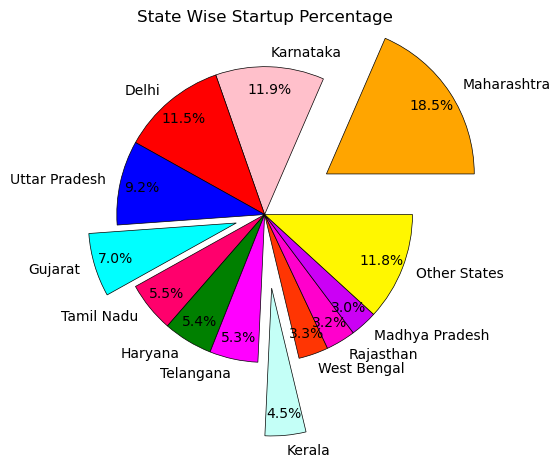

In [13]:
color_list = ["orange", "pink", "red", "blue",'cyan','#ff006c','green','magenta','#c4fff7','#ff3503','#ff00cc','#cb00f5','#fff700']
plt.pie(no_of_startup_by_state_df1.Count, labels=no_of_startup_by_state_df1.State, autopct='%1.1f%%',\
        explode=[0.5,0,0,0,0.2,0,0,0,0.5,0,0,0,0],pctdistance=0.85,colors=color_list,\
       wedgeprops={'linewidth':0.5,'edgecolor':'black'})
plt.title('State Wise Startup Percentage')

plt.rcParams.update({'font.size': 8})

plt.show()


In [14]:
import geopandas as gpd
shp_gdf = gpd.read_file('india-polygon.shp')
shp_gdf.head()

id                        st_nm  \
0 NaN  Andaman and Nicobar Islands   
1 NaN            Arunachal Pradesh   
2 NaN                        Assam   
3 NaN                        Bihar   
4 NaN                   Chandigarh   

                                            geometry  
0  MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...  
1  POLYGON ((95.23643 26.68105, 95.19594 27.03612...  
2  POLYGON ((95.19594 27.03612, 95.08795 26.94578...  
3  POLYGON ((88.11357 26.54028, 88.28006 26.37640...  
4  POLYGON ((76.84208 30.76124, 76.83758 30.72552...

pip install geopandas

In [15]:
merged_map_data_df = shp_gdf.set_index('st_nm').join(no_of_startup_by_state_df.set_index('State'))
merged_map_data_df = merged_map_data_df.replace(np.nan, 0)

merged_map_data_df

id  \
st_nm                              
Andaman and Nicobar Islands  0.0   
Arunachal Pradesh            0.0   
Assam                        0.0   
Bihar                        0.0   
Chandigarh                   0.0   
Chhattisgarh                 0.0   
Dadra and Nagar Haveli       0.0   
Daman and Diu                0.0   
Goa                          0.0   
Gujarat                      0.0   
Haryana                      0.0   
Himachal Pradesh             0.0   
Jharkhand                    0.0   
Karnataka                    0.0   
Kerala                       0.0   
Lakshadweep                  0.0   
Madhya Pradesh               0.0   
Maharashtra                  0.0   
Manipur                      0.0   
Meghalaya                    0.0   
Mizoram                      0.0   
Nagaland                     0.0   
Delhi                        0.0   
Puducherry                   0.0   
Punjab                       0.0   
Rajasthan                    0.0   
Sikkim                       0.0   
Tamil Nadu                   0.0   
Telangana                    0.0   
Tripura                      0.0   
Uttar Pradesh                0.0   
Uttarakhand                  0.0   
West Bengal                  0.0   
Odisha                       0.0   
Andhra Pradesh               0.0   
Jammu and Kashmir            0.0   
Ladakh                       0.0   

                                                                      geometry  \
st_nm                                                                            
Andaman and Nicobar Islands  MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...   
Arunachal Pradesh            POLYGON ((95.23643 26.68105, 95.19594 27.03612...   
Assam                        POLYGON ((95.19594 27.03612, 95.08795 26.94578...   
Bihar                        POLYGON ((88.11357 26.54028, 88.28006 26.37640...   
Chandigarh                   POLYGON ((76.84208 30.76124, 76.83758 30.72552...   
Chhattisgarh                 POLYGON ((83.94694 23.62196, 83.95594 23.62406...   
Dadra and Nagar Haveli       POLYGON ((73.20640 20.12165, 73.20865 20.10695...   
Daman and Diu                POLYGON ((72.80144 20.37378, 72.84418 20.47463...   
Goa                          POLYGON ((74.11982 15.65278, 74.24806 15.65698...   
Gujarat                      MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...   
Haryana                      POLYGON ((77.12555 30.56374, 77.21329 30.50281...   
Himachal Pradesh             POLYGON ((78.92089 31.25498, 79.01313 31.11211...   
Jharkhand                    POLYGON ((87.79410 25.22084, 87.77835 25.10108...   
Karnataka                    POLYGON ((77.55301 18.29376, 77.65650 17.97231...   
Kerala                       POLYGON ((76.43261 11.66713, 76.23238 11.57049...   
Lakshadweep                  MULTIPOLYGON (((74.10182 11.20491, 73.96458 11...   
Madhya Pradesh               POLYGON ((82.81529 23.96232, 82.55207 23.79214...   
Maharashtra                  POLYGON ((80.66449 21.33184, 80.64649 21.25411...   
Manipur                      POLYGON ((94.68073 25.45405, 94.59974 25.18932...   
Meghalaya                    POLYGON ((92.43993 25.03175, 92.07772 25.18512...   
Mizoram                      POLYGON ((93.00013 24.39934, 92.98439 24.12620...   
Nagaland                     POLYGON ((95.23643 26.68105, 95.06770 26.46044...   
Delhi                        POLYGON ((77.19755 28.86191, 77.33703 28.67912...   
Puducherry                   MULTIPOLYGON (((79.79156 10.99271, 79.79156 10...   
Punjab                       POLYGON ((76.73859 30.93982, 76.73859 30.93562...   
Rajasthan                    POLYGON ((74.28855 29.95655, 74.29980 29.95655...   
Sikkim                       POLYGON ((88.75926 27.14748, 88.59728 27.19370...   
Tamil Nadu                   MULTIPOLYGON (((79.78256 11.89825, 79.79156 11...   
Telangana                    POLYGON ((81.05595 17.79162, 81.05820 17.75380...   
Tripura                      POLYGON ((92.23295 24.50229, 92.27345 24.38673...   
U

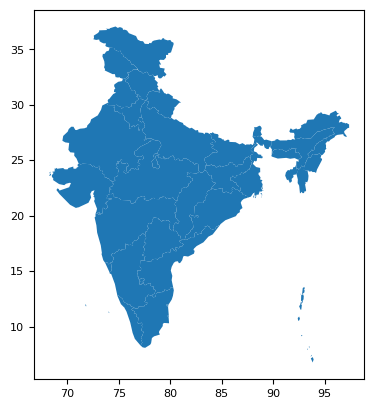

In [16]:
shp_gdf.plot()
plt.show()

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('''Chloropleth Map of Number 
of Startups, State-wise''', fontdict={'fontsize': '20', 'fontweight' : '10'})

#Plot the figure:
merged_map_data_df.plot(column='Count',cmap='RdPu', linewidth=0.8, ax=ax, edgecolor='0',\
            legend=True, legend_kwds={'label': "Number of Startups"})

<AxesSubplot:title={'center':'Chloropleth Map of Number \nof Startups, State-wise'}>

### Corelation of Year vs Number of Startups

In [18]:
yearwise_count_df=primary_df.groupby('Year').sum()['Count'].reset_index()
yearwise_count_df

Year  Count
0  2017   4352
1  2018   8944
2  2019  11718
3  2020  14806
4  2021  20303
5  2022  19196

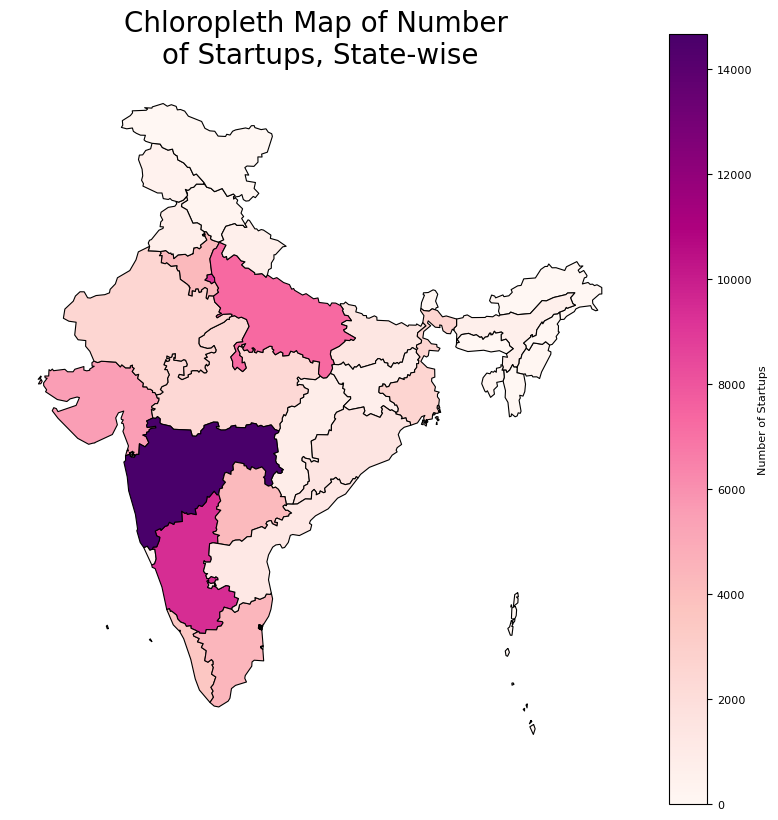

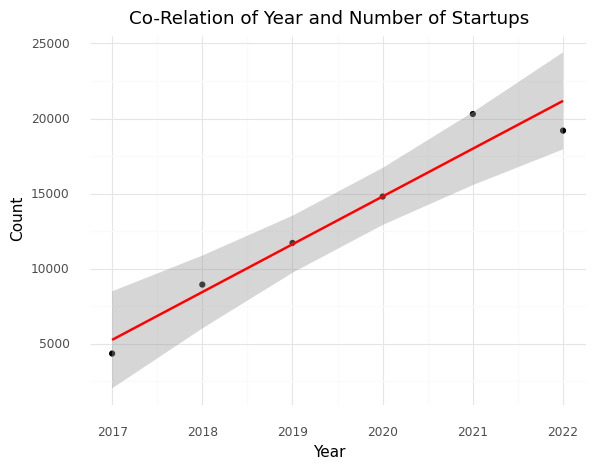

In [19]:
plot=p9.ggplot(yearwise_count_df,p9.aes(x='Year',y='Count'))+\
p9.geom_point()+\
p9.geom_smooth(method='lm',color='Red')+\
p9.ggtitle('Co-Relation of Year and Number of Startups')+\
p9.theme_minimal()
print(plot)

In [20]:
import plotly.express as px

# State vs Industry Vs Count in Ploty.expess
px.scatter_3d(primary_df, x="State",y='Industry',z="Count",
  color='Industry')

In [21]:
secondary_df=pd.read_csv('Unicorns India.csv').dropna()
new = secondary_df["Location"].str.split("/", expand = True)

# removing foreign state from data frame Location columns
secondary_df["Location"]= new[0]
 
secondary_df

No             Company                                  Sector  \
0    102.0  Molbio Diagnostics                Healthtech - Diagnostics   
1    101.0          Shiprocket         Aggregator - Logistics Services   
2    100.0             OneCard                  Fintech - Credit Cards   
3     99.0         Leadsquared                              SaaS - CRM   
4     98.0             Purplle  E-Commerce - Personal Care & Cosmetics   
..     ...                 ...                                     ...   
97     5.0              PayTM^             Fintech - Payments & Wallet   
98     4.0           Snapdeal*                              E-Commerce   
99     3.0            Mu Sigma                        SaaS - Analytics   
100    2.0           Flipkart^                              E-Commerce   
101    1.0              InMobi                     Adtech - Mobile Ads   

     Entry Valuation^^ ($B)  Valuation ($B)#   Entry   Location  \
0                      1.53             1.53  Sep-22        Goa   
1                      1.23             1.23  Aug-22      Delhi   
2                      1.30             1.30  Jul-22       Pune   
3                      1.00             1.00  Jun-22  Bangalore   
4                      1.10             1.10  Jun-22     Mumbai   
..                      ...              ...     ...        ...   
97                     1.70            16.00  Feb-15      Noida   
98                     1.80             2.40  Oct-14      Delhi   
99                     1.00             1.50  Feb-13  Bangalore   
100                    1.00            37.60  Feb-12  Bangalore   
101                    1.00             1.00  Sep-11  Bangalore   

                                      Select Investors  
0                               Temasek, Motilal Oswal  
1    Lightrock India, Info Edge, Tribe Capital, Tem...  
2    QED Investors, Matrix Partners India, Sequoia ...  
3          Stakeboat Capital, Gaja Capital, WestBridge  
4    JSW Ventures, IvyCap Ventures, Blume Ventures,...  
..                                                 ...  
97   Saama Capital, Elevation Capital, Alibaba, Ber...  
98   Kalaari Capital, Nexus Ventures, Bessemer, Sof...  
99            Accel, Sequoia Capital, General Atlantic  
100    Accel, Tiger Global, Naspers, SoftBank, Tencent  
101                  KPCB, Sherpalo Ventures, SoftBank  

[102 rows x 8 columns]

#### Generating WordCloud for Biggest investors

pip install wordcloud

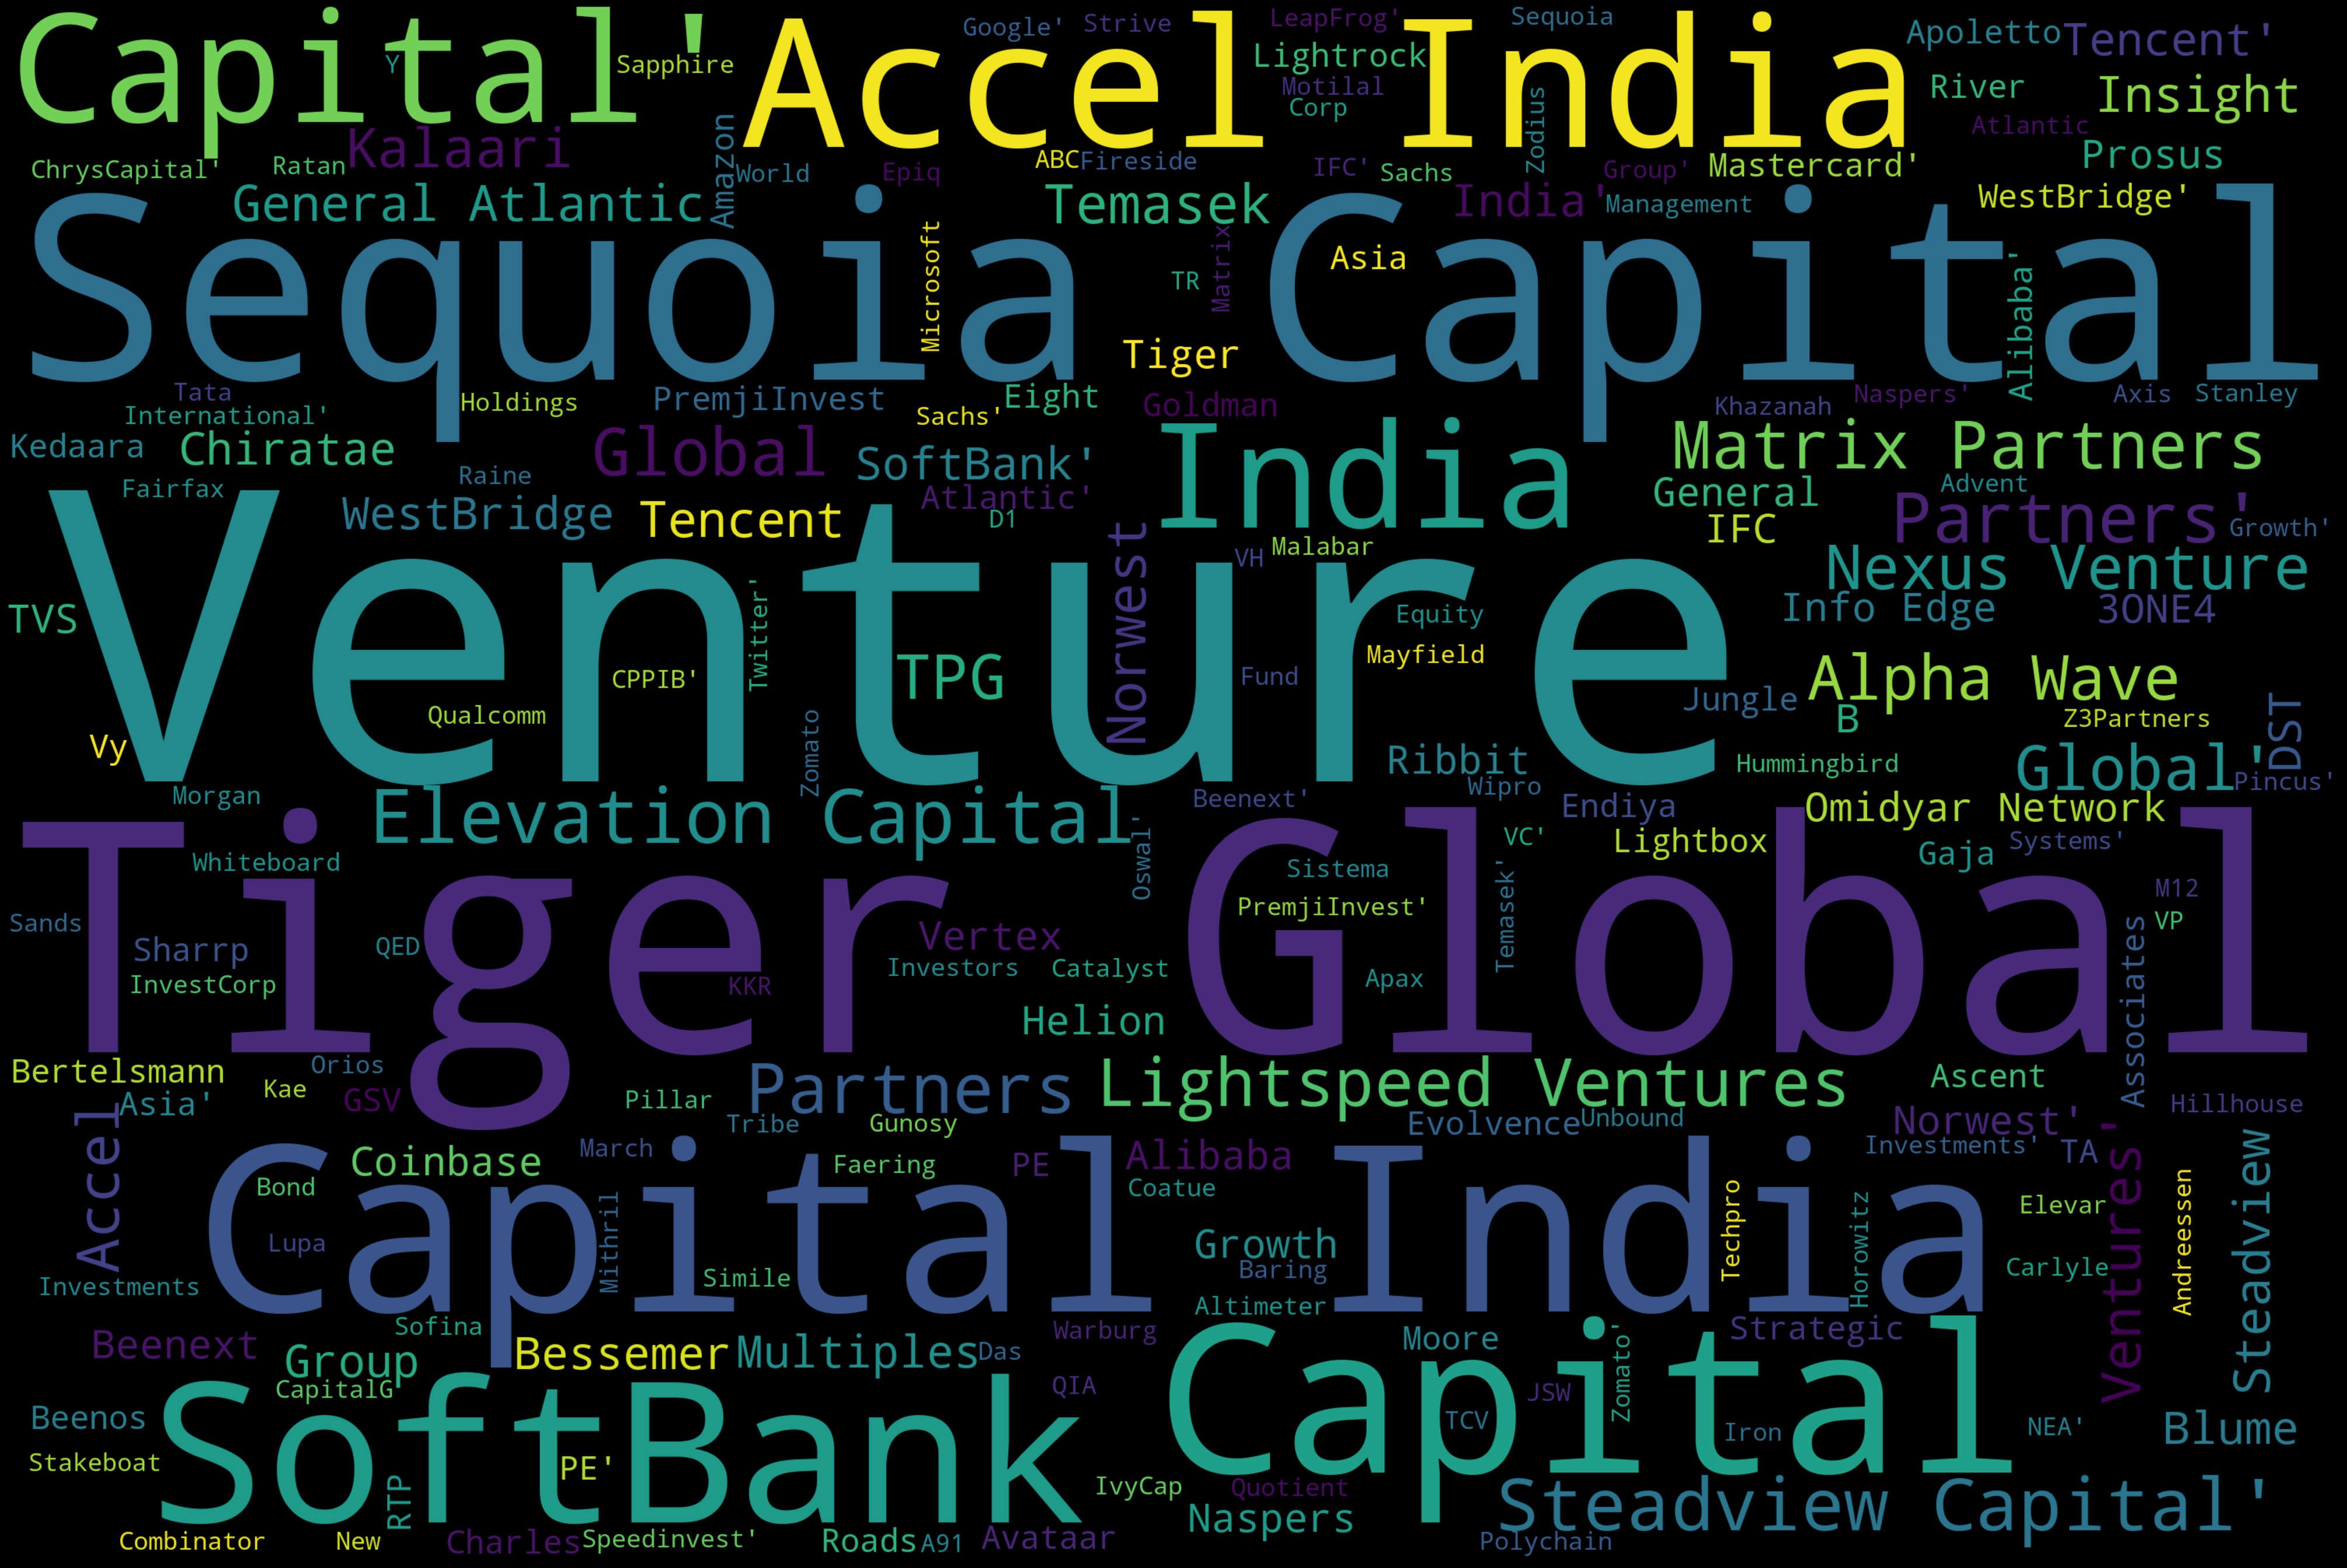

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = secondary_df['Select Investors'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'Black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

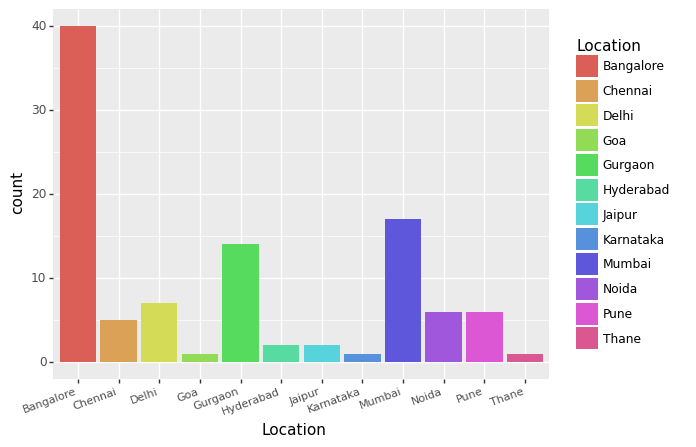

In [23]:
plot2=p9.ggplot(secondary_df,p9.aes(x='Location',fill='Location'))+p9.geom_bar()+\
p9.theme(axis_text_x =p9.element_text(angle=20,hjust = 1,size=8))

print(plot2)